In [1]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC


### Making linear Support Vector Machine

In [2]:
iris = load_iris(as_frame=True)
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [4]:
iris.data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [5]:
X = iris.data.copy()

In [6]:
y = pd.DataFrame(columns=['Target'],data= iris.target.values)

In [7]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


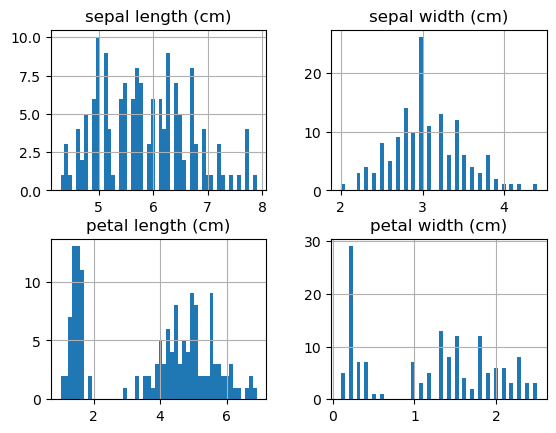

In [9]:
X.hist(bins=50)
plt.show()

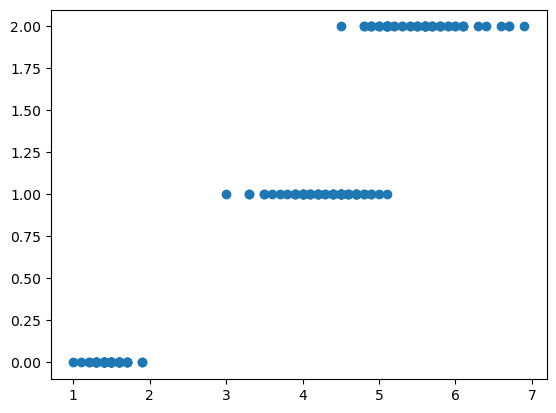

In [10]:
plt.scatter(X['petal length (cm)'],y['Target'])

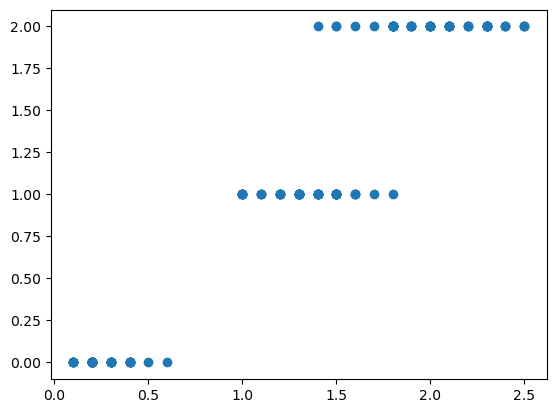

In [11]:
plt.scatter(X['petal width (cm)'],y['Target'])

In [12]:
y['Target'] = y['Target'].replace([2],[0])

In [13]:
y.value_counts()

Target
0         100
1          50
dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=42)

In [15]:
svm_clf  = make_pipeline(StandardScaler(), LinearSVC(C=1, random_state=42))
svm_clf.fit(X_train,y_train)

c:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [16]:
y_preds = svm_clf.predict(X_test)

In [17]:
y_preds

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix,recall_score
print(accuracy_score(y_test,y_preds))
print(confusion_matrix(y_test,y_preds))

0.7894736842105263
[[24  3]
 [ 5  6]]


In [19]:
X_new = [[5.5,1.7],[5.0,1.5]]
svm_clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [20]:
svm_clf.decision_function(X_test)

array([ 0.22868613, -1.17028069,  0.31817417, -0.16941264,  0.10609473,
       -0.8564993 , -0.30217556, -0.80657021,  0.6151315 ,  0.09021841,
       -0.69250363, -0.21105343, -0.88395699, -0.2924824 , -1.2289552 ,
       -0.6320625 , -0.39535268,  0.39077538,  0.09404729, -0.23325978,
       -0.44605046, -0.37924712, -0.82180671, -0.15882555, -0.96577104,
       -0.66111139,  0.46233577, -0.66504229, -0.3599219 , -0.33451919,
       -1.08426508, -1.98175764, -0.35655878, -0.67140815, -0.53865251,
        0.13790254, -0.50936179, -0.81839706])

### Making Nonlinear SVM Classification

In [21]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X,y = make_moons(n_samples=100, noise=0.15,random_state=42)

polynomial_svm_clf = make_pipeline( PolynomialFeatures(degree=3),StandardScaler(),LinearSVC(C=10,max_iter=10_000,random_state=42))

In [22]:
polynomial_svm_clf.fit(X_train,y_train)

c:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

In [23]:
y_preds_poly = svm_clf.predict(X_test)

In [24]:
print(accuracy_score(y_test,y_preds_poly))
print(confusion_matrix(y_test,y_preds_poly))

0.7894736842105263
[[24  3]
 [ 5  6]]


### Using polynomial Kernel

In [25]:
from sklearn.svm import SVC

In [26]:
poly_kernel_svm_clf = make_pipeline(StandardScaler(),SVC(kernel="poly",degree=3, coef0=1,C=5))

In [27]:
poly_kernel_svm_clf.fit(X_train,y_train)

c:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [28]:
y_preds_poly_kernal = poly_kernel_svm_clf.predict(X_test)

In [29]:
print(accuracy_score(y_test,y_preds_poly_kernal))
print(confusion_matrix(y_test,y_preds_poly_kernal))

0.9736842105263158
[[26  1]
 [ 0 11]]


In [30]:
from sklearn.tree import DecisionTreeClassifier

deciTree = DecisionTreeClassifier(max_depth=2,random_state=42)

In [31]:
deciTree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [32]:
y_preds_deci=deciTree.predict(X_test)

In [33]:
print(accuracy_score(y_test,y_preds_deci))
print(confusion_matrix(y_test,y_preds_deci))

0.9736842105263158
[[27  0]
 [ 1 10]]


In [35]:
from sklearn.tree import export_graphviz

export_graphviz(
    deciTree,
    out_file="iris_tree.dot",
    feature_names=["Sepal length (cm)","Sepal width (cm)", "Petal length (cm)","Petal width (cm)"],
    class_names= iris.target_names,
    rounded=True,
    filled=True
)

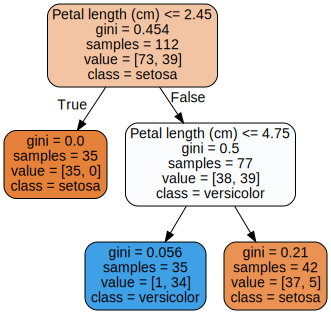

In [36]:
from graphviz import Source
Source.from_file("iris_tree.dot")